## An attempt to estimate Ne and sampling time from the correlation in segregting sites 

In [1]:
# Testing the performance of Monte-Carlo Estimators 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append('../../src/')
from plot_utils import *

%matplotlib inline

In [2]:
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['figure.facecolor'] = "w"
plt.rcParams['figure.autolayout'] = True
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os

# Making the relevant figure directories that we want
main_figdir = '../../plots/two_locus_stats/corrSASB_sims/'
supp_figdir = '../../plots/supp_figs/two_locus_stats/corrSASB_sims/'
os.makedirs(main_figdir, exist_ok=True)
os.makedirs(supp_figdir, exist_ok=True)

In [3]:
fname = '../../results/corr_seg_sites/est_ta_Ne_corr_sa_sb.csv'
df = pd.read_csv(fname)
df.head()

,scenario,ta,ta_est,se_ta_est,Ne_est,se_Ne_est
0,SerialConstant,0,3.031356e+02,1.979427e+01,8090.367136,19.383743
1,TennessenEuropean,0,4.479192e-21,4.329505e-21,7124.033212,11.558165
2,SerialConstant,100,3.760312e+02,1.470392e+01,8342.151167,21.402484
3,TennessenEuropean,100,1.916471e-20,4.049841e-21,6860.790907,7.295584
4,SerialConstant,1000,2.470833e+03,2.245912e+01,8035.558406,22.776082


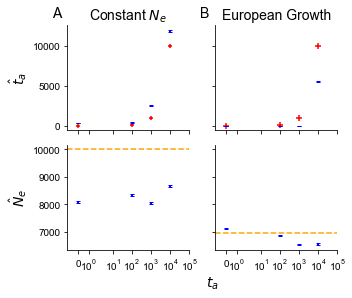

In [4]:
fig, ax = plt.subplots(2,2, figsize=(5,4), sharex=True, sharey='row')

constant_df = df[df['scenario'] == 'SerialConstant']
ax[0,0].errorbar(constant_df.ta.values, constant_df.ta_est.values, 
                 yerr=2*constant_df.se_ta_est, capsize=2, lw=2, linestyle='none', color='blue', zorder=5)

ax[0,0].scatter(constant_df.ta.values, constant_df.ta.values, color='red', s=20, marker='+', zorder=1)

# Plot estimates of Ne
ax[1,0].errorbar(constant_df.ta.values, constant_df.Ne_est.values, 
                 yerr=2*constant_df.se_Ne_est, capsize=2, lw=2, linestyle='none', color='blue')

growth_df = df[df['scenario'] == 'TennessenEuropean']
ax[0,1].errorbar(growth_df.ta.values, growth_df.ta_est.values, 
                 yerr=2*growth_df.se_ta_est, capsize=2, lw=2, linestyle='none', color='blue', zorder=5)
ax[0,1].scatter(growth_df.ta.values, growth_df.ta.values, color='red', marker='+', zorder=1)

# Plot estimates of Ne
ax[1,1].errorbar(growth_df.ta.values, growth_df.Ne_est.values, 
                 yerr=2*growth_df.se_Ne_est, capsize=2, lw=2, linestyle='none', color='blue')

ax[1,0].axhline(1e4, linestyle='--', color='orange')
ax[1,1].axhline(6958., linestyle='--', color='orange')
ax[0,0].set_xlim(-1,1e5)

ax[0,0].set_title(r'Constant $N_e$', fontsize=14)
ax[0,1].set_title(r'European Growth', fontsize=14)
ax[0,0].set_ylabel(r'$\hat{t}_a$', fontsize=14)
ax[1,0].set_ylabel(r'$\hat{N}_e$', fontsize=14)

ax[0,0].set_xscale('symlog')

for i, label in enumerate(('A', 'B')):
    ax[0,i].text(-0.05, 1.18, label, fontsize=14, 
               fontweight='bold', va='top', ha='right', transform=ax[0,i].transAxes);

debox(ax[0,0]); debox(ax[0,1]);
debox(ax[1,0]); debox(ax[1,1]);

fig.text(0.6, -0.01, r'$t_a$', fontsize=14, ha='center')
plt.tight_layout()
plt.savefig(supp_figdir + 'lstsq_constant_growth.pdf', bbox_inches='tight', dpi=300)